* Following: http://www.cond-mat.de/teaching/DFT/qm1d.html
* 1D numeric Shrodinger equation solver, by discretisation to an Eigenvalue problem

$$f''(x_i) \approx (f(x_{i-1})-2*f(x_i)+f(x_{i+1}))/dx^2$$

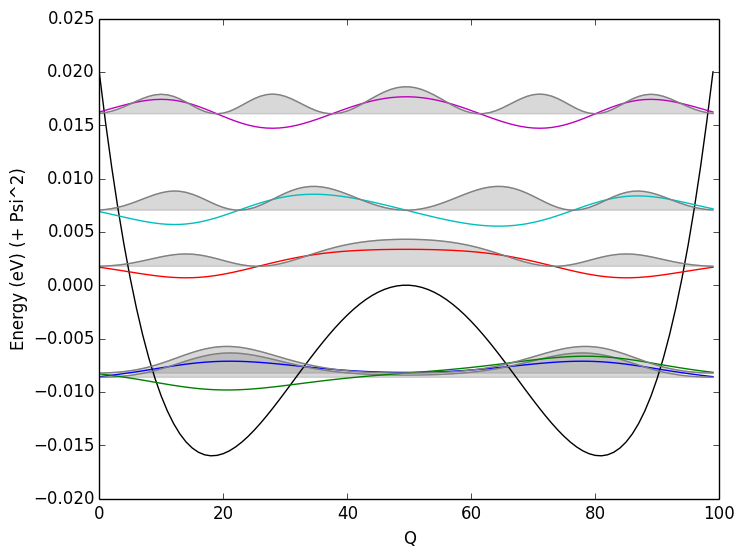

0.0

In [2]:
# Following: http://www.cond-mat.de/teaching/DFT/qm1d.html
# 1D numeric Shrodinger equation solver, by discretisation to an Eigenvalue problem
#  $f''(x_i) \approx (f(x_{i-1})-2*f(x_i)+f(x_{i+1}))/dx^2$

using PyPlot

#PyPlot.figure(figsize=(12,8))
# Large plots for figure generation

# Call as:
#  V() - anonymous function to generate potential energy
#  N - discretisation of TISH (and therefore size of matrix to diagonalise)
#  n - number of eigenenergies to plot
#  dx - Kinetic-Energy term, results in how closely spaced the energy levels are
function TISH(V,N=99,n=3,dx=1E2/(N-1))
    xlabel("Q")
    ylabel("Energy (eV) (+ Psi^2)")
    plot([V(r) for r in -1.0:2/N:1.0],color="black")    # Potential energy curve
    
    
    # PE terms on the trace
    diagonal = [(2.0/dx^2 + V(r))::Float64 for r in -1.0:2/N:1.0]
    
    # KE terms on the tridiagonals
    updiagonal = [(-1/dx^2)::Float64 for r in 1:N]
    H =diagm(diagonal,0) + diagm(updiagonal,1) + diagm(updiagonal,-1)

    # And solve with dense eigensolvers
    evals,evec=eig(H)

    # This many eigenenergies
    for i in 1:n
        # Ψ ; the wavefunction, offset by the eigenvalue
        plot(1E-2.*evec[:,i]+evals[i])
        
        # Ψ^2 , the Prob. density, plotted grey, offset by the eigenvalues
        plot(1E-1.*evec[:,i].^2+evals[i],color="grey")
        # Ψ^2, the prob density, filled curve in semi-tranparent grey, offset + to the eigenvalues
        fill_between(0:N,evals[i],evals[i]+1E-1.*evec[:,i].^2,color="grey",alpha=0.3)
    end
    
    return evals,evec
end

#V(r)=-3/abs(r) #- q^2/()   #... ish
#V(r)=1E-3*r^2  # Harmonic well
#V(r)=0 # infinite well pot.
#V(r)= 0.01*r^2+0.1*r  # an-Harmonic well


#TISH(r->r^2) # Harmonic well
#TISH(r->0) # Infinite well potential.
#TISH(r->3*r^2+r)
#TISH(r->-0.1/abs(r)) # Atom like - 1/r Coulomb potential
#TISH(r->20*r^2-20*abs(r),100,6) # Pretty crummy mexican hat
TISH(r->10E-2*r^4-8E-2*r^2,99,5) # Double well potential; for a 'soft mode' quantum harmonic oscillator phonon instability
#TISH(r->10E-2*r^4-8E-2*r^2,99,0) # Just visualise the above potential (for figure for talk)
#TISH(r->10E-2*r^4,99,20) # Single well potential

0.0 # Stop Eigenvalues / eigvecs being autoprinted


Right - very well! We have a 1D TISH solver.
Now we're going to set up a function to generate a Bose-Einstein distribution, to be able to calculate the occupation of these states in a Quantum Harmonic Oscillator (i.e. phonon populations)

In [3]:
kBeV=8.6173324E-5 # in units of eV

function BE(E,μ=0.0,T=300.0)
    # System specifics + derived quantities
    #T=300           # Temperature; Kelvin
    β=1/(kBeV*T)      # Thermodynamic Beta; units
    1/(exp((E-μ)*β)-1)
end

BE (generic function with 3 methods)

So now, let's get our `evals` and `evecs` from the TISH solver, then integrate over the set of eigenvalues, multiplying each probability density function ($\Psi^2$) with a Bose-Einstein (BE) occupation factor.

We'll set the internal $\mu$ in the BE distribution to a value kbT below the lowest energy level to make it much less infinity, and roughly integrate out to give ~1, but then explicitly normalise the total density to exactly 1. I'm not quite sure what value should be used for $\mu$, it acts as a normalisation constant for the DoS. I assume it is explicitly a chemical potential, but as the population of Phonons changes, this confuses me.

Bose Einstein weight matrix: 0.581977 0.580715 0.124370 0.086102 0.073223 0.057225 0.029478 0.015306 0.010194 0.005776 0.002243 0.000927 0.000474 0.000196 0.000059 0.000019 0.000008 0.000002 0.000001 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0

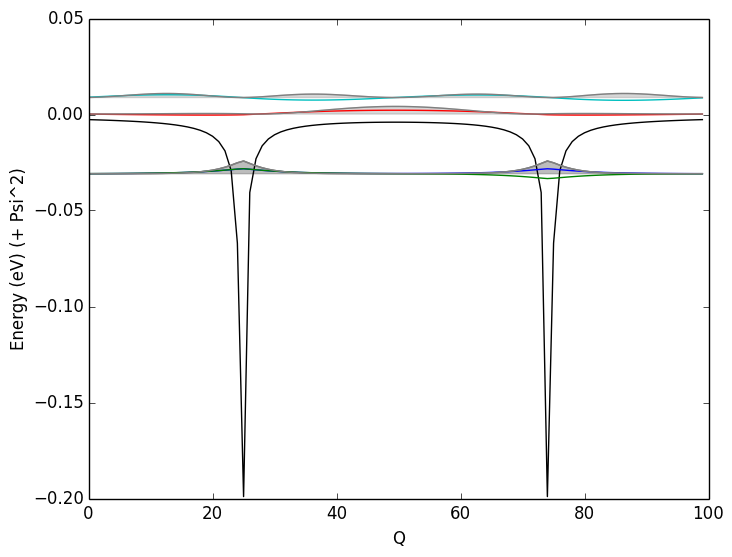

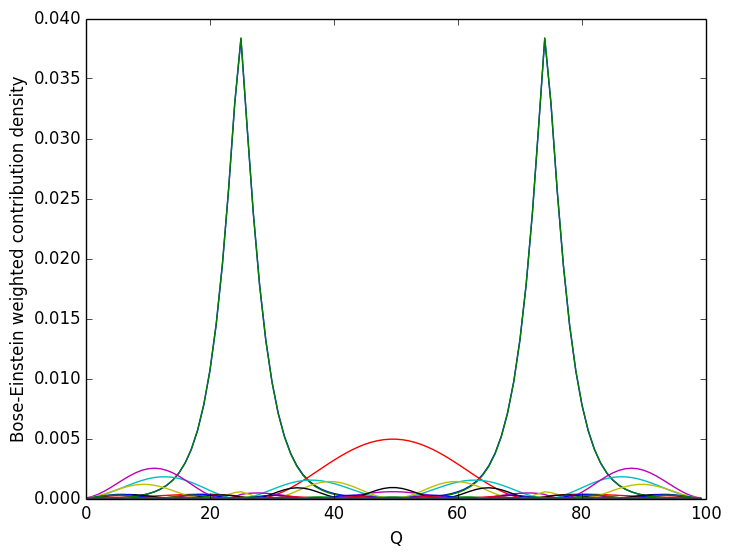

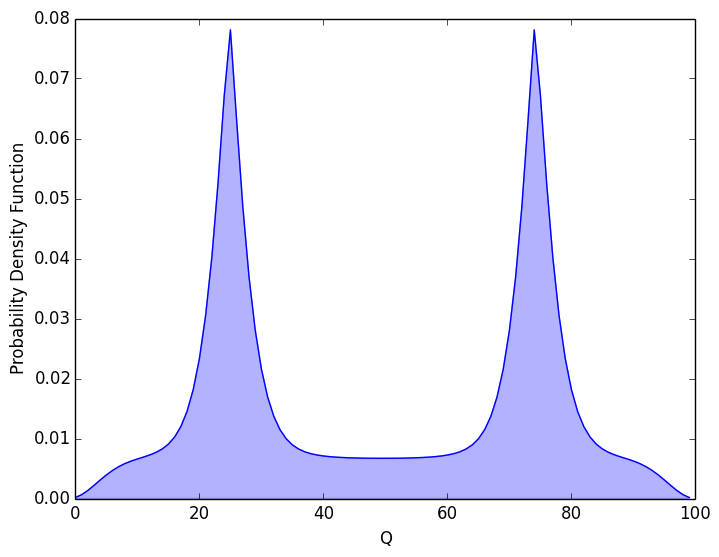

.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 

1.5682956514620428

In [4]:
N=99
#evals,evecs=TISH(r->10E-2*r^4-8E-2*r^2,N,4) # Double well potential; for a 'soft mode' quantum harmonic oscillator phonon instability
#evals,evecs=TISH(r->10E-2*r^4-8E-2*r^2+4E-3*r,N,4) # Double well potential; with a slant
evals,evecs=TISH(r->-1E-3*(abs(r+0.5))^-1-1E-3*(abs(r-0.5))^-1,N,4) # Two minima, sort of like a hydrogen molecule

totaldensity=0.0
@printf("Bose Einstein weight matrix: ")

fig=figure() # new figure please
xlabel("Q")
ylabel("Bose-Einstein weighted contribution density")


for i in 1:length(evals)
#    println(BE(evals[i],evals[1]) )
    T=300
    BEweight=BE(evals[i],evals[1]-kBeV*T,T)
    # alpha set to kbT below the lowest energy level, ~ unitary summation
    @printf("%f ",BEweight)

    # Plot of weighted ψ^2 probability densities 
    plot(BEweight * evecs[:,i].^2)
    # Sum up density
    totaldensity+= (BEweight * evecs[:,i].^2) # Density of this structure
end

fig=figure() # new figure please
plot(totaldensity) # curve of total density
fill_between(0:N,0,totaldensity,color="blue",alpha=0.3) # nice filled curve, partially transparent
xlabel("Q")
ylabel("Probability Density Function")

sum(totaldensity)

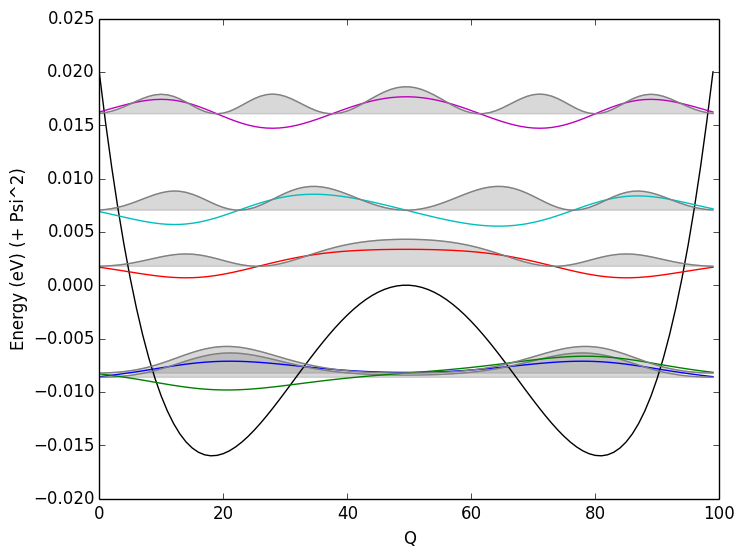

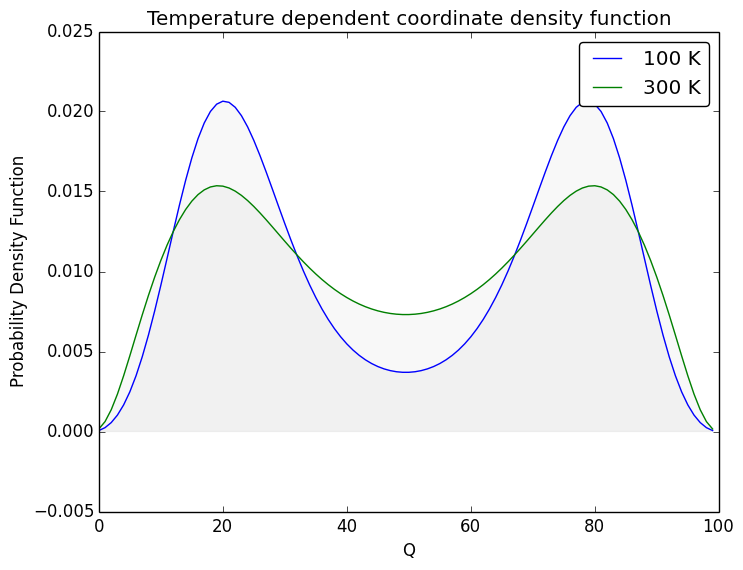

1.0 0.9999999999999999 

PyObject <matplotlib.legend.Legend object at 0x323c0a7d0>

In [5]:
#fig=figure(figsize=(12,8)) # Large figure for high res talks
N=99
evals,evecs=TISH(r->10E-2*r^4-8E-2*r^2,N,5) # Double well potential; for a 'soft mode' quantum harmonic oscillator phonon instability
#evals,evecs=TISH(r->10E-2*r^4,N,20) # Single well potential

#fig=figure(figsize=(12,8)) # new figure please
fig=figure()
xlabel("Q")
ylabel("Probability Density Function")
title("Temperature dependent coordinate density function")

# Iterate over these temperatures
for T in [100,300]
    totaldensity=0.0
    for i in 1:length(evals)
        BEweight=BE(evals[i],evals[1]-kBeV*T,T)
        # alpha set to kbT below the lowest energy level, ~ unitary summation

        # Plot of weighted ψ^2 probability densities 
        #plot(BEweight * evecs[:,i].^2)
        # Sum up density
        totaldensity+= (BEweight * evecs[:,i].^2) # Density of this structure
    end
    totaldensity/=sum(totaldensity) # renormalise probability density to ∫ dx =1
    
    # Plot this together in a vaguely pleasant way
    plot(totaldensity,label=@sprintf("%d K",T)) # Plot the PDF, with a label
    fill_between(0:N,0,totaldensity,color="grey",alpha=0.05) # Add a filled curve in grey for PDF, with light alpha
    print(sum(totaldensity)," ") # check normalisation of BE + wavefunction
end
legend(loc="upper right",fancybox="true") # Create a legend of all the existing plots using their labels as names


OK; now we want to calculate some kind of electron phonon coupling, so let's try convolving the deformation potential (tabulated) with the density from these thingies

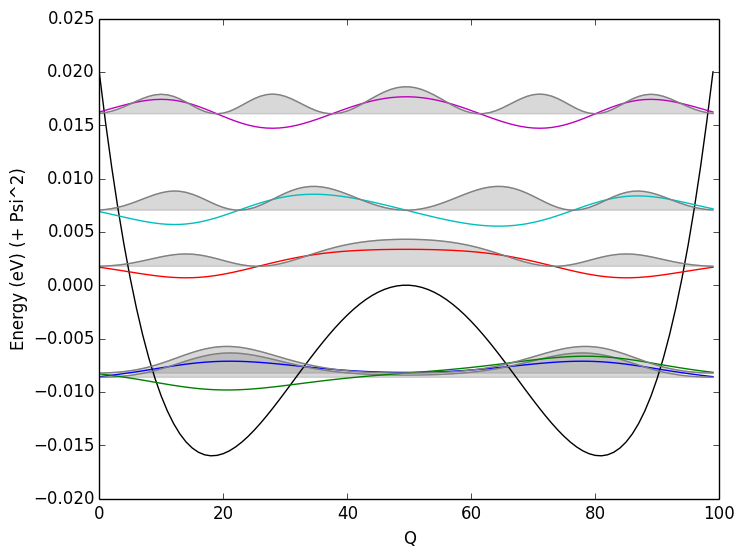

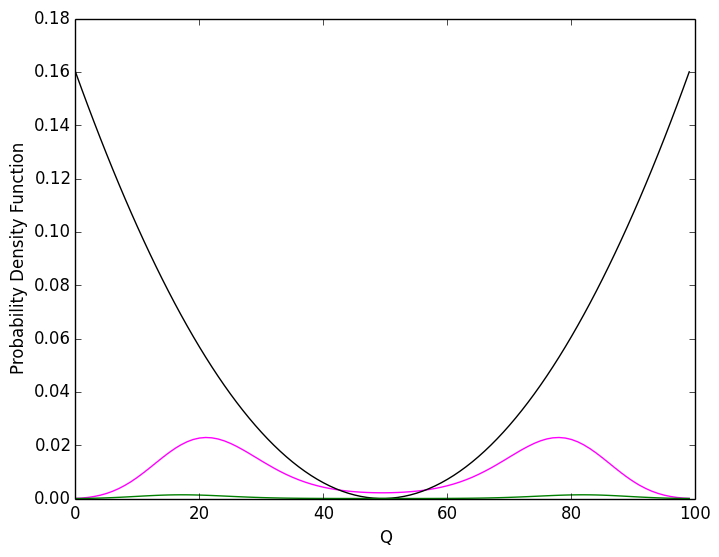

E-Ph coupling: 0.049742 eV


In [6]:
N=99
evals,evecs=TISH(r->10E-2*r^4-8E-2*r^2,N,5) # Double well potential; for a 'soft mode' quantum harmonic oscillator phonon instability

fig=figure() # new figure please
xlabel("Q")
ylabel("Probability Density Function")


WavefunctionDensity=evecs[:,1].^2
plot(WavefunctionDensity,color="magenta")    # Potential energy curve

DeformationPotential(Q)=16E-2*Q^2 # Approximate fit to Lucy's data; 160 meV at the extrema, quadratic
DeformationTabulated=[DeformationPotential(r)::Float64 for r in -1.0:2/N:1.0]
plot(DeformationTabulated,color="black")    # Q-resolved deformation potential

EPhCouple=WavefunctionDensity.*DeformationTabulated
plot(EPhCouple,color="green")    # Q-resolved coupling

@printf("E-Ph coupling: %f eV\n",sum(EPhCouple))


That seemed to work! So now we can do the summation over a large number of different Bose-Einstein distribution temperatures, to see what sort of effective el-ph interaction we find.

T: 1 E-Ph: 0.027473 eV
T: 51 E-Ph: 0.030622 eV
T: 101 E-Ph: 0.031205 eV
T: 151 E-Ph: 0.031827 eV
T: 201 E-Ph: 0.032537 eV
T: 251 E-Ph: 0.033272 eV
T: 301 E-Ph: 0.033994 eV
T: 351 E-Ph: 0.034685 eV
T: 401 E-Ph: 0.035337 eV
T: 451 E-Ph: 0.035947 eV
T: 501 E-Ph: 0.036518 eV
T: 551 E-Ph: 0.037051 eV
T: 601 E-Ph: 0.037549 eV
T: 651 E-Ph: 0.038015 eV
T: 701 E-Ph: 0.038451 eV
T: 751 E-Ph: 0.038859 eV
T: 801 E-Ph: 0.039243 eV


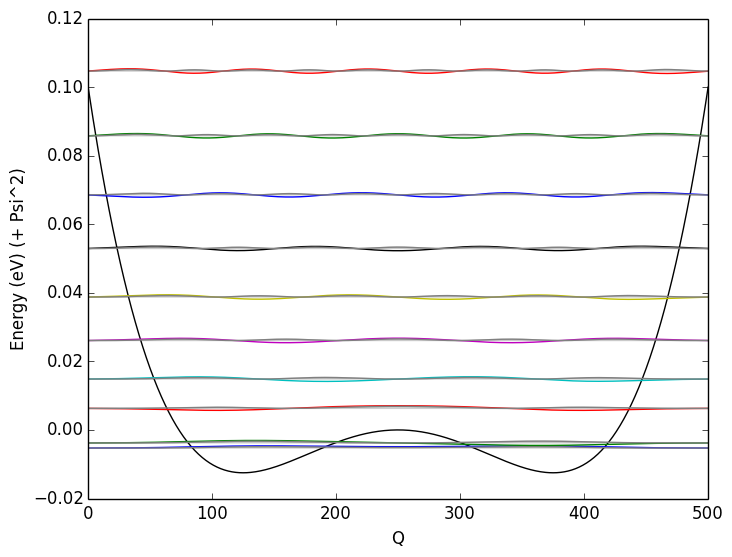

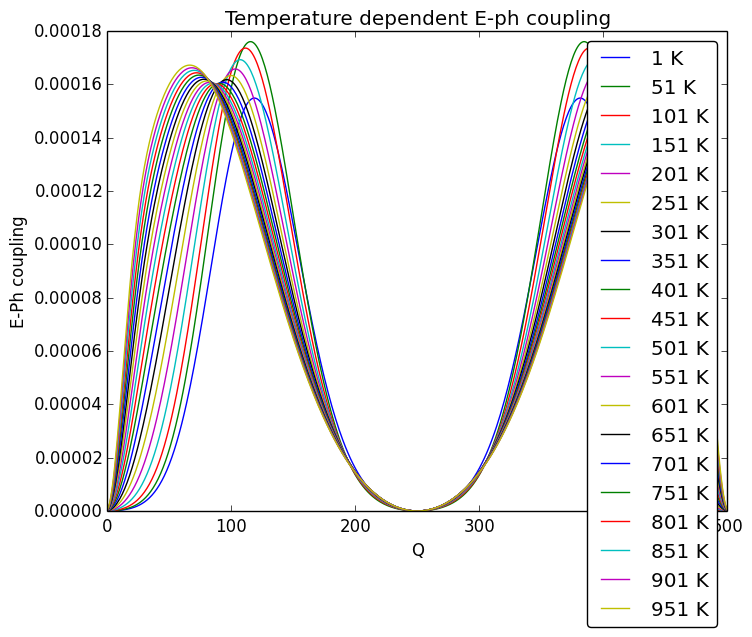

T: 851 E-Ph: 0.039604 eV
T: 901 E-Ph: 0.039944 eV
T: 951 E-Ph: 0.040265 eV


PyObject <matplotlib.legend.Legend object at 0x32388df10>

In [7]:
N=500
dx=1E2/(N-1)
evals,evecs=TISH(r->20E-2*r^4-10E-2*r^2,N,10,dx) # Double well potential; for a 'soft mode' quantum harmonic oscillator phonon instability
#evals,evecs=TISH(r->10E-2*r^4-8E-2*r^2,N,5)
#evals,evecs=TISH(r->10E-2*r^4,N,20) # Single well potential

fig=figure() # new figure please
xlabel("Q")
ylabel("E-Ph coupling")
title("Temperature dependent E-ph coupling")

# Iterate over these temperatures
for T in collect(1:50:1000)  #[1,50,100,150,200,300,600,10000] #collect(1:300) 
    totaldensity=0.0
    for i in 1:length(evals)
        BEweight=BE(evals[i],evals[1]-kBeV*T,T)
        # alpha set to kbT below the lowest energy level, ~ unitary summation
#        if (BEweight>0.001)
#            @printf("T: %03d State: %d : %f eV BE=%f \n",T,i,evals[i],BEweight)
#        end
        
        # Plot of weighted ψ^2 probability densities 
        #plot(BEweight * evecs[:,i].^2)
        # Sum up density
        totaldensity+= (BEweight * evecs[:,i].^2) # Density of this structure
    end
    totaldensity/=sum(totaldensity) # renormalise probability density to ∫ dx =1
    
    DeformationPotential(Q)=16E-2*Q^2 # Vaguely fitted to Lucy's data; quadratic form
#    DeformationPotential(Q)=16E-2*abs(Q) # Linear form
#    DeformationPotential(Q)=1.0 # constant
    
    DeformationTabulated=[DeformationPotential(Q)::Float64 for Q in -1.0:2/N:1.0]
#    plot(DeformationTabulated,color="pink")    # Q-resolved deformation potential

    EPhCouple=totaldensity.*DeformationTabulated
    plot(EPhCouple,label=@sprintf("%d K",T))    # Q-resolved coupling
    
#    fig=figure() # new figure please
#    plt[:hist](EPhCouple,100) 
 
    @printf("T: %d E-Ph: %f eV\n",T,sum(EPhCouple))
    
    # Plot this together in a vaguely pleasant way
#    plot(totaldensity,label=@sprintf("%d K",T)) # Plot the PDF, with a label
#    fill_between(0:N,0,totaldensity,color="grey",alpha=0.05) # Add a filled curve in grey for PDF, with light alpha
end
legend(loc="upper right",fancybox="true") # Create a legend of all the existing plots using their labels as names


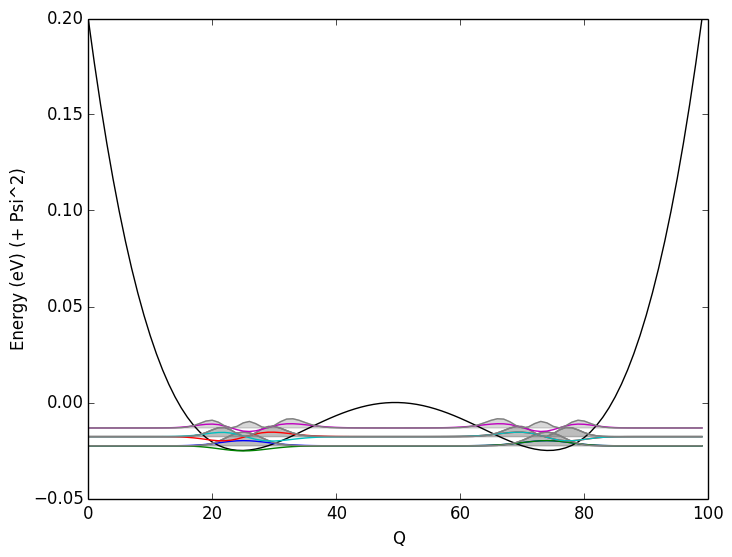

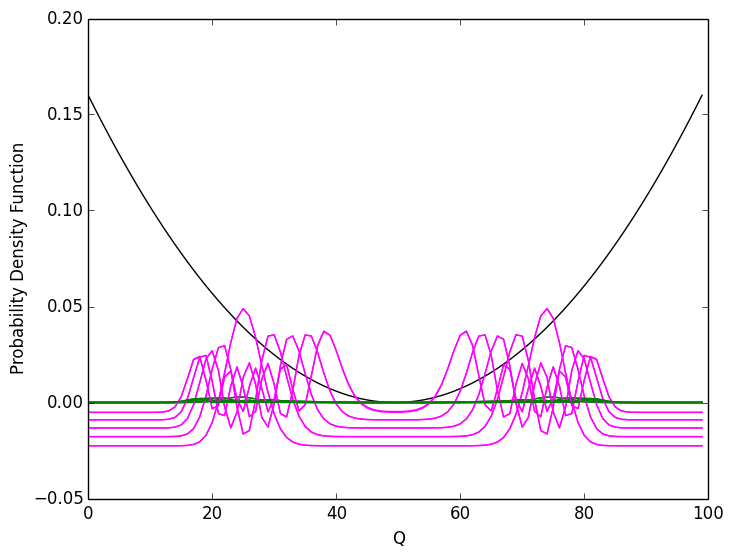

E-Ph coupling: 0.038980 eV
E-Ph coupling: 0.038980 eV
E-Ph coupling: 0.036832 eV
E-Ph coupling: 0.036832 eV
E-Ph coupling: 0.034479 eV
E-Ph coupling: 0.034479 eV
E-Ph coupling: 0.031797 eV
E-Ph coupling: 0.031805 eV
E-Ph coupling: 0.028376 eV
E-Ph coupling: 0.028642 eV


In [8]:
# Attempt to plot the individual modes, for interest
N=99

dx=5E2/(N-1)

evals,evecs=TISH(r->40E-2*r^4-20E-2*(r)^2,N,5,dx) # Double well potential; for a 'soft mode' quantum harmonic oscillator phonon instability

fig=figure() # new figure please
xlabel("Q")
ylabel("Probability Density Function")


DeformationPotential(Q)=16E-2*Q^2 # Approximate fit to Lucy's data; 160 meV at the extrema, quadratic
DeformationTabulated=[DeformationPotential(r)::Float64 for r in -1.0:2/N:1.0]
plot(DeformationTabulated,color="black")    # Q-resolved deformation potential


for state in 1:10
    WavefunctionDensity=evecs[:,state].^2
    plot(WavefunctionDensity+evals[state],color="magenta")    # Potential energy curve

    #print(WavefunctionDensity)
    EPhCouple=WavefunctionDensity.*DeformationTabulated
    plot(EPhCouple,color="green")    # Q-resolved coupling

    @printf("E-Ph coupling: %f eV\n",sum(EPhCouple))
end

Quantum Tunneling Between Wells - 14-7-16

There are a number of different approaches you could take, including semi-classical ones (v. similar to electron hopping that I did during my PhD), WKB approximation. Here I start with a very general analytic quantum mechanical analysis.

If we look at the states ($\Psi_n$) localised in the wells, you can see that the first state is symmetric, and the then the second state is anti-symmetric. The Pauli exclusion principle leads to a slight splitting in the degeneracy.

Our Hamiltonian is time independent, which means that we can use our eigenstates as a basis
$$\Psi_n(Q,t) = \Psi_n(Q).e^{-i \omega_n t}$$

As expected, the time-dependence of this wavefunction just leads to a phase term (entirely imaginary dependence on $t$), as the $\Psi_n$ are eigenstates of a time-independent Hamiltonian. The states will just beat at a characteristic frequency.

So let's construct a wavepacket of $\Psi_1$ and $\Psi_2$.

$$\Phi(Q,t)=\frac{1}{\sqrt{2}} \left( \Psi_1(Q,t) + \Psi_2(Q,t)  \right)$$

Expand to our time-dependent form above,

$$\Phi(Q,t)=\frac{1}{\sqrt{2}} \left( \Psi_1(Q).e^{-i \omega_1 t} + \Psi_2(Q).e^{-i \omega_2 t}  \right)$$

Bring out the base frequency-beating term,

$$\Phi(Q,t)=\frac{1}{\sqrt{2}} e^{-i \omega_1 t} \left( \Psi_1(Q) + \Psi_2(Q).e^{-i (\omega_2-\omega_1) t}  \right)$$

The observable we are interested in is the location of the wavepacket. 
We evaluate the probability density function by calculating the states's expectation value with the position operator

$$ < \Phi(Q,t) | \, \hat{X} \, | \Phi(Q,t > 
= \Phi(Q,t)\Phi^*(Q,t)
= \frac{1}{\sqrt{2}} e^{-i \omega_1 t} \left( \Psi_1(Q) + \Psi_2(Q).e^{-i (\omega_2-\omega_1) t}  \right) \frac{1}{\sqrt{2}} e^{i \omega_1 t} \left( \Psi_1(Q) + \Psi_2(Q).e^{i (\omega_2-\omega_1) t}  \right)
= \frac{1}{2} \left( \Psi_1^2(Q) + \Psi_1(Q)\Psi_2(Q).e^{-i (\omega_2-\omega_1) t} + \Psi_1(Q)\Psi_2(Q).e^{+i (\omega_2-\omega_1)t} + \Psi_2^2(Q) \right) $$

Not 100% sure I got all the algebra right there :^)

But the key thing is that the state is phasing between 

$$ |\Psi_1> \;\rightarrow\; |\Psi_1\Psi_2> \;\rightarrow\; |\Psi_2> \;\rightarrow\; |\Psi_2\Psi_1>$$

The $\Psi_1$ and $\Psi_2$ states are delocalised between the two wells, but as these are Even and Odd wavefunctions, the combinations will be localised in state 1 and state 2.

And there's only one, obvious, time constant 

$$e^{-i (\omega_2-\omega_1) t}$$

By Euler's identity, $e^{i\pi}=-1$

$$\tau=(\omega_2-\omega_1)/\pi$$

By $\omega=E/\hbar$, this is

$$\tau = \frac{E_2-E_1}{\pi\hbar}$$

So really quite trivial! The time constant of beating between the states (tunneling through the potential barrier) is simply related to the splitting of the states.

Classically, with a harmonic potential, you would have a Simple Harmonic Oscillator with $\tau=\frac{2\pi}{\omega}$ where $\omega=\sqrt{\frac{k}{m}}$.

For this system at a finite temperature, we should be able to consider a Bose-Einstein distribution of weights, and then collect an overall tunneling time constant by summing the weighted rates:

$$\tau_{total} = \left( \frac{p_1}{\tau_1} + \frac{p_2}{\tau_2} + \frac{p_3}{\tau_3} ... \right)^{-1} $$

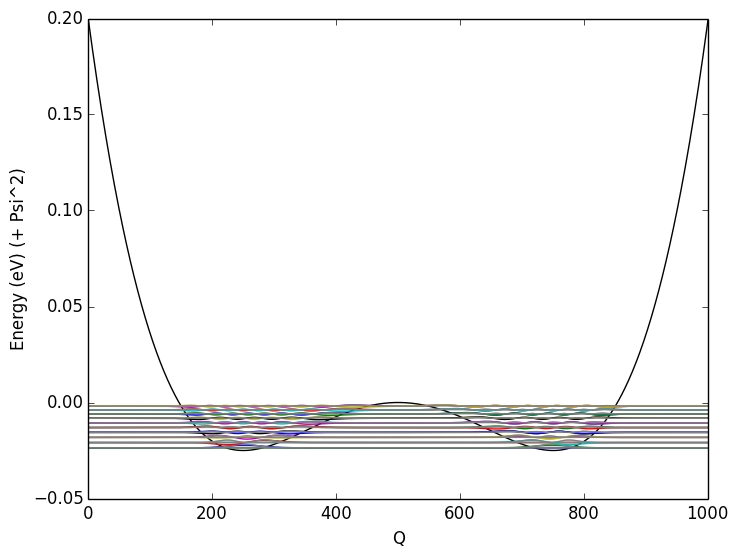

E_1 = -0.023606	 E_2 = -0.023606 	ΔE = 3.81639e-17 eV
Tunneling time: 0.018456 s


In [56]:
ħeV=6.582119514E-16

N=1000
dx=9E2/(N-1)
#dx=6.11e3/(N-1)


evals,evecs=TISH(r->40E-2*r^4-20E-2*(r)^2,N,20,dx) # Double well potential; for a 'soft mode' quantum harmonic oscillator phonon instability

@printf("E_1 = %f\t E_2 = %f \tΔE = %g eV\n",evals[1],evals[2],evals[2]-evals[1])

τ=(evals[2]-evals[1])/(π*ħeV)

@printf("Tunneling time: %f s\n",τ)

In [57]:
for n in 1:2:20
    τ=(evals[n+1]-evals[n])/(π*ħeV)
    @printf("Base State: %d \tΔE: %g eV \tτ: %f s\n",n,evals[n+1]-evals[n],τ)
end


Base State: 1 	ΔE: 3.81639e-17 eV 	τ: 0.018456 s
Base State: 3 	ΔE: 4.51028e-17 eV 	τ: 0.021812 s
Base State: 5 	ΔE: 2.77556e-17 eV 	τ: 0.013423 s
Base State: 7 	ΔE: 2.4182e-15 eV 	τ: 1.169439 s
Base State: 9 	ΔE: 2.48933e-13 eV 	τ: 120.383377 s
Base State: 11 	ΔE: 1.85879e-11 eV 	τ: 8989.057769 s
Base State: 13 	ΔE: 1.0316e-09 eV 	τ: 498878.288724 s
Base State: 15 	ΔE: 4.27277e-08 eV 	τ: 20663016.605511 s
Base State: 17 	ΔE: 1.29568e-06 eV 	τ: 626589687.829325 s
Base State: 19 	ΔE: 2.68324e-05 eV 	τ: 12976090174.659994 s
